# Procentual fat loss

C:\Users\mauls\AppData\Local\Temp\ipykernel_25796\661580700.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  percentage = ((kcal - 1200*kg) / 5800)/kg


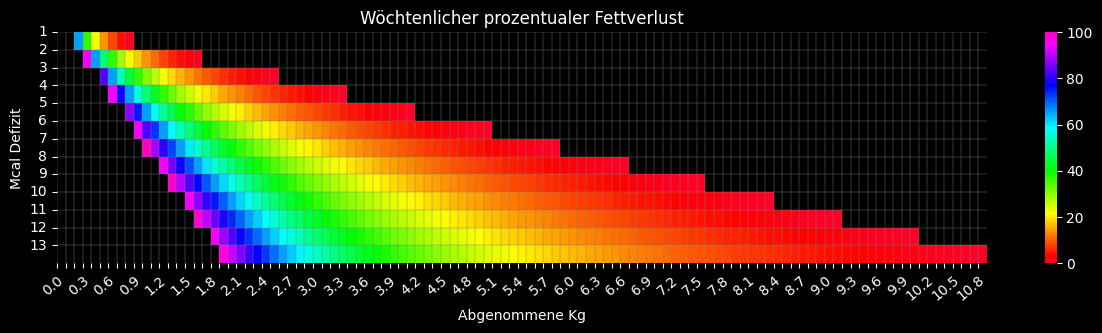

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('dark_background')


kcal_fat = 7000 # 1kg
kcal_muscles = 1200 # 1kg
kg_steps = 0.1
max_kcal_defizit = 14000
kcal_steps = 1000

kcal_defizit = np.arange(kcal_steps, max_kcal_defizit, kcal_steps)
lost_kg = np.arange(0, kcal_defizit[-1]/kcal_muscles, kg_steps)
lost_fat_percentag = np.ones([len(kcal_defizit), len(lost_kg)])
for kcal_num, kcal in enumerate(kcal_defizit):
    for kg_num, kg in enumerate(lost_kg):
        percentage = ((kcal - 1200*kg) / 5800)/kg
        percentage = np.nan if percentage < 0 else percentage
        percentage = np.nan if percentage > 1 else percentage
        lost_fat_percentag[kcal_num, kg_num] = percentage*100 if percentage is not np.nan else percentage

fig, ax = plt.subplots(1, figsize=(15, 3))
sns.heatmap(lost_fat_percentag, annot=False, cmap='gist_rainbow', ax=ax)
ax.set_title("Wöchtenlicher prozentualer Fettverlust")
ax.set_yticks(range(len(kcal_defizit)), range(1, len(kcal_defizit)+1), rotation="horizontal")
ax.set_ylabel("Mcal Defizit")
round_lost_kg = [round(kg, 1) for kg in lost_kg]
x_tick_names = [kg if num%3==0 else "" for num, kg in enumerate(round_lost_kg)]
ax.set_xticks(range(len(x_tick_names)), x_tick_names, rotation=40, ha='right', rotation_mode='anchor')
ax.set_xlabel("Abgenommene Kg")
ax.grid(color='gray', linestyle='-', linewidth=0.3)
